<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-케라스-Sequential-모델-시작하기" data-toc-modified-id="1.-케라스-Sequential-모델-시작하기-1">1. 케라스 Sequential 모델 시작하기</a></span><ul class="toc-item"><li><span><a href="#모듈-import" data-toc-modified-id="모듈-import-1.1">모듈 import</a></span></li><li><span><a href="#데이터-준비" data-toc-modified-id="데이터-준비-1.2">데이터 준비</a></span></li><li><span><a href="#Sequential-모델-생성-및-레이어-추가" data-toc-modified-id="Sequential-모델-생성-및-레이어-추가-1.3">Sequential 모델 생성 및 레이어 추가</a></span></li><li><span><a href="#학습과정-설정" data-toc-modified-id="학습과정-설정-1.4">학습과정 설정</a></span></li><li><span><a href="#모델-훈련" data-toc-modified-id="모델-훈련-1.5">모델 훈련</a></span></li><li><span><a href="#모델-성능평가-및-예측" data-toc-modified-id="모델-성능평가-및-예측-1.6">모델 성능평가 및 예측</a></span></li></ul></li><li><span><a href="#2.-Sequential-모델-생성-시-레이어-추가하기" data-toc-modified-id="2.-Sequential-모델-생성-시-레이어-추가하기-2">2. Sequential 모델 생성 시 레이어 추가하기</a></span><ul class="toc-item"><li><span><a href="#모델-생성-시-레이어-추가-:-Activation-층을-별도-층으로-추가" data-toc-modified-id="모델-생성-시-레이어-추가-:-Activation-층을-별도-층으로-추가-2.1">모델 생성 시 레이어 추가 : Activation 층을 별도 층으로 추가</a></span></li><li><span><a href="#모델-생성-시-레이어-추가-:-Activation-층을-포함하여-추가" data-toc-modified-id="모델-생성-시-레이어-추가-:-Activation-층을-포함하여-추가-2.2">모델 생성 시 레이어 추가 : Activation 층을 포함하여 추가</a></span></li></ul></li><li><span><a href="#3.-케라스-함수형-API-첫걸음" data-toc-modified-id="3.-케라스-함수형-API-첫걸음-3">3. 케라스 함수형 API 첫걸음</a></span><ul class="toc-item"><li><span><a href="#밀집-연결-네트워크(예시)" data-toc-modified-id="밀집-연결-네트워크(예시)-3.1">밀집 연결 네트워크(예시)</a></span></li></ul></li><li><span><a href="#4.-Keras-시각화" data-toc-modified-id="4.-Keras-시각화-4">4. Keras 시각화</a></span></li></ul></div>

# 1. 케라스 Sequential 모델 시작하기

## 모듈 import

In [1]:
from tensorflow import keras

## 데이터 준비

In [2]:
# mnist datasets load
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# test data의 일부를 predict data로 분리
x_pred, y_pred = x_test[:1000], y_test[:1000]
x_test, y_test = x_test[1000:], y_test[1000:]

In [3]:
print("train data shape:", x_train.shape, y_train.shape)
print("test data shape:", x_test.shape, y_test.shape)
print("predict data shape:", x_pred.shape, y_pred.shape)

train data shape: (60000, 28, 28) (60000,)
test data shape: (9000, 28, 28) (9000,)
predict data shape: (1000, 28, 28) (1000,)


## Sequential 모델 생성 및 레이어 추가

In [4]:
model = keras.models.Sequential()

In [5]:
model.add(keras.layers.Flatten(input_shape=(28, 28)))  #(28, 28) 2차원 shape를 28*28 => 1차원 (784,) shape로 변경
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
# 모델 구조 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


## 학습과정 설정

In [7]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

## 모델 훈련

In [8]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 2s 952us/step - loss: 0.2953 - accuracy: 0.9168
Epoch 2/5
1875/1875 [==============================] - 2s 875us/step - loss: 0.1417 - accuracy: 0.9585
Epoch 3/5
1875/1875 [==============================] - 2s 956us/step - loss: 0.1028 - accuracy: 0.9696
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0817 - accuracy: 0.9754
Epoch 5/5
1875/1875 [==============================] - 2s 946us/step - loss: 0.0670 - accuracy: 0.9796


In [9]:
#dir(history)
dir(history.history)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [10]:
#print(history.history.keys())
history.history["accuracy"]   # or "loss"

[0.916783332824707,
 0.9585000276565552,
 0.9696166515350342,
 0.975433349609375,
 0.979616641998291]

## 모델 성능평가 및 예측

In [11]:
# 학습에 사용하지 않은 테스트 데이터로 성능을 평가
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)

282/282 [==============================] - 0s 833us/step - loss: 0.0939 - accuracy: 0.9721


In [12]:
loss_and_metrics  # loss & accuracy

[0.09390056878328323, 0.9721111059188843]

In [13]:
classes = model.predict(x_pred, batch_size=32)

In [14]:
classes.shape  # 예측 결과는 10개 classes에 대한 확률값이다. (가장 큰 확률의 index 값이 예측결과 이다.)

(1000, 10)

In [15]:
# 예측값과 실제값을 비교해봅니다.
import numpy as np

pred = [np.argmax(_) for _ in classes]    # 확률값 중 가장 큰 값을 예측값으로 변환

# 예측이 잘못된 결과만 출력해봅니다.
# for p, y in zip(pred, y_pred):
#     if p != y:
#         print(p, y)

# 예측 정확도를 확인해봅니다.
acc = [p==y for p, y in zip(pred, y_pred)]
print("예측정확도:", np.sum(acc)/len(acc))

예측정확도: 0.967


# 2. Sequential 모델 생성 시 레이어 추가하기

## 모델 생성 시 레이어 추가 : Activation 층을 별도 층으로 추가

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

In [17]:
model2 = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(64),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

In [18]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [19]:
model2.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3080 - accuracy: 0.9127
Epoch 2/5
1875/1875 [==============================] - 2s 864us/step - loss: 0.1522 - accuracy: 0.9557
Epoch 3/5
1875/1875 [==============================] - 2s 900us/step - loss: 0.1120 - accuracy: 0.9664
Epoch 4/5
1875/1875 [==============================] - 2s 940us/step - loss: 0.0877 - accuracy: 0.9737
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0728 - accuracy: 0.9778


## 모델 생성 시 레이어 추가 : Activation 층을 포함하여 추가

In [20]:
model3 = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
])

In [21]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [22]:
model3.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3088 - accuracy: 0.9133
Epoch 2/5
1875/1875 [==============================] - 2s 907us/step - loss: 0.1505 - accuracy: 0.9567
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1067 - accuracy: 0.9686
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0825 - accuracy: 0.9756
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0680 - accuracy: 0.9795


# 3. 케라스 함수형 API 첫걸음

## 밀집 연결 네트워크(예시)

밀집 연결 네트워크를 구현하기에는 Sequential 모델이 더 적합한 선택이겠지만, 아주 간단한 예시를 위해서 케라스 함수형 API로 구현해 보겠습니다.

- 레이어 인스턴스는 (텐서에 대해) 호출 가능하고, 텐서를 반환합니다.

- 인풋 텐서와 아웃풋 텐서는 Model을 정의하는데 사용됩니다.

- 이 예시 모델은 케라스 Sequential 모델과 완전히 동일한 방식으로 학습됩니다.

In [23]:
# reshape
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
x_pred = x_pred.reshape(-1, 784)
print(x_train.shape, x_test.shape, x_pred.shape)

(60000, 784) (9000, 784) (1000, 784)


In [24]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model

# Input 레이어는 텐서를 반환합니다
inputs = Input(shape=(784,))

# 레이어 인스턴스는 텐서에 대해 호출 가능하고, 텐서를 반환합니다
x = Dense(64, activation='relu')(inputs)
predictions = Dense(10, activation='softmax')(x)

# 이는 Input 레이어와 3개의 Dense 레이어를 포함하는 모델을 만들어 냅니다
model4 = Model(inputs=inputs, outputs=predictions)

# 모델 컴파일
model4.compile(optimizer='rmsprop',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [25]:
model4.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


# 4. Keras 시각화

In [26]:
# 학습 데이터 중 일부를 Validation Data로 분리하여 검증을 함께 수행 합니다.
# 모델/레이어 생성 및 컴파일 명령 수행 후 아래의 명령을 수행 합니다.
history = model4.fit(x_train, y_train, validation_split=0.25, epochs=20, batch_size=16, verbose=1)

Epoch 1/20
2813/2813 [==============================] - 3s 1ms/step - loss: 0.3026 - accuracy: 0.9145 - val_loss: 0.1935 - val_accuracy: 0.9447
Epoch 2/20
2813/2813 [==============================] - 3s 1ms/step - loss: 0.1592 - accuracy: 0.9540 - val_loss: 0.1737 - val_accuracy: 0.9533
Epoch 3/20
2813/2813 [==============================] - 4s 1ms/step - loss: 0.1234 - accuracy: 0.9648 - val_loss: 0.1444 - val_accuracy: 0.9619
Epoch 4/20
2813/2813 [==============================] - 3s 1ms/step - loss: 0.1064 - accuracy: 0.9711 - val_loss: 0.1373 - val_accuracy: 0.9644
Epoch 5/20
2813/2813 [==============================] - 3s 1ms/step - loss: 0.0915 - accuracy: 0.9755 - val_loss: 0.1487 - val_accuracy: 0.9642
Epoch 6/20
2813/2813 [==============================] - 3s 1ms/step - loss: 0.0846 - accuracy: 0.9783 - val_loss: 0.1470 - val_accuracy: 0.9658
Epoch 7/20
2813/2813 [==============================] - 3s 1ms/step - loss: 0.0779 - accuracy: 0.9799 - val_loss: 0.1418 - val_accuracy:

In [27]:
# history 객체의 key가 버전에 따라 다를 수 있음(아래 명령으로 key 확인)
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

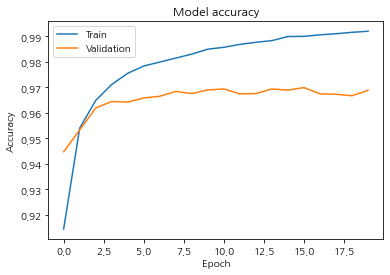

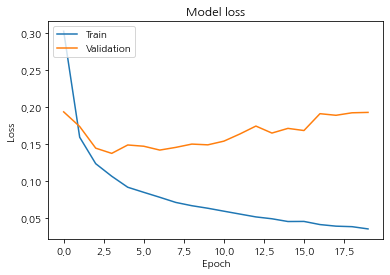

In [28]:
import matplotlib.pyplot as plt

# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 학습 손실 값과 검증 손실 값을 플롯팅 합니다.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()